# Datos Faltantes

In [3]:
# Importar librerías necesarias
import pandas as pd
import numpy as np
from sklearn.datasets import load_diabetes
from sklearn.impute import SimpleImputer, KNNImputer
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# Cargar el conjunto de datos
diabetes = load_diabetes(as_frame=True)
data = diabetes.data
data['target'] = diabetes.target

In [5]:
data.sample(10)

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
370,0.019913,-0.044642,-0.057941,-0.057313,-0.001569,-0.012587,0.074412,-0.039493,-0.061176,-0.075636,63.0
276,0.012648,-0.044642,0.026128,0.063187,0.125019,0.091691,0.063367,-0.002592,0.057573,-0.021788,283.0
137,0.005383,-0.044642,0.049840,0.097615,-0.015328,-0.016345,-0.006584,-0.002592,0.017036,-0.013504,280.0
229,-0.027310,0.050680,-0.015906,-0.029770,0.003935,-0.000688,0.041277,-0.039493,-0.023647,0.011349,53.0
93,-0.049105,-0.044642,-0.064408,-0.102070,-0.002945,-0.015406,0.063367,-0.047243,-0.033246,-0.054925,96.0
275,-0.005515,0.050680,-0.011595,0.011544,-0.022208,-0.015406,-0.021311,-0.002592,0.011011,0.069338,94.0
159,-0.005515,-0.044642,0.043373,0.087287,0.013567,0.007141,-0.013948,-0.002592,0.042341,-0.017646,195.0
52,-0.052738,-0.044642,-0.009439,-0.005670,0.039710,0.044719,0.026550,-0.002592,-0.018114,-0.013504,59.0
143,-0.030942,-0.044642,0.005650,-0.009113,0.019070,0.006828,0.074412,-0.039493,-0.041176,-0.042499,60.0
166,-0.056370,0.050680,-0.060097,-0.036656,-0.088254,-0.070833,-0.013948,-0.039493,-0.078140,-0.104630,70.0


In [6]:
# Simular valores faltantes
np.random.seed(42)
data.loc[data.sample(frac=0.1).index, 'bmi'] = np.nan
data.loc[data.sample(frac=0.1).index, 'bp'] = np.nan

# Ejercicios
Contesta las siguientes preguntas. Para cada pregunta, deberás escribir código que demostrará cómo llegaste al resultado:

### 1. ¿Cuántos valores faltantes hay en cada columna?**

In [7]:
# Contar valores faltantes por columna
missing_values = data.isnull().sum()
print('Valores faltantes por columna:')
print(missing_values)
print(f'\nPorcentaje de valores faltantes:')
print((missing_values / len(data) * 100).round(2))

Valores faltantes por columna:
age        0
sex        0
bmi       44
bp        44
s1         0
s2         0
s3         0
s4         0
s5         0
s6         0
target     0
dtype: int64

Porcentaje de valores faltantes:
age       0.00
sex       0.00
bmi       9.95
bp        9.95
s1        0.00
s2        0.00
s3        0.00
s4        0.00
s5        0.00
s6        0.00
target    0.00
dtype: float64


### 2. Utiliza imputación simple (media) para llenar los valores faltantes de la columna 'bmi'.

In [8]:
# Guardar columna original antes de imputar
bmi_original = data['bmi'].copy()

# Imputación simple con la media
simple_imputer = SimpleImputer(strategy='mean')
data['bmi_simple'] = simple_imputer.fit_transform(data[['bmi']])

print(f'Media original (sin NaN): {bmi_original.mean():.6f}')
print(f'Media después de imputación simple: {data["bmi_simple"].mean():.6f}')
print(f'Valores faltantes en bmi_simple: {data["bmi_simple"].isnull().sum()}')

Media original (sin NaN): -0.000205
Media después de imputación simple: -0.000205
Valores faltantes en bmi_simple: 0


### 3. Utiliza KNNImputer para imputar valores en las columnas 'bmi' y 'bp'. Compara los resultados con los de la imputación simple.

In [9]:
# KNN Imputer para 'bmi' y 'bp'
knn_imputer = KNNImputer(n_neighbors=5)
data_knn = data[['bmi', 'bp']].copy()
data[['bmi_knn', 'bp_knn']] = knn_imputer.fit_transform(data_knn)

# Comparación: Simple vs KNN para 'bmi'
mask_bmi = bmi_original.isnull()
print('Comparación de valores imputados en bmi (primeros 5 casos con NaN):')
comparison = pd.DataFrame({
    'Simple (media)': data.loc[mask_bmi, 'bmi_simple'],
    'KNN': data.loc[mask_bmi, 'bmi_knn']
}).head()
print(comparison)

print(f'\nMedia imputación simple bmi: {data["bmi_simple"].mean():.6f}')
print(f'Media imputación KNN bmi:    {data["bmi_knn"].mean():.6f}')
print(f'\nDesv. estándar imputación simple bmi: {data["bmi_simple"].std():.6f}')
print(f'Desv. estándar imputación KNN bmi:    {data["bmi_knn"].std():.6f}')

Comparación de valores imputados en bmi (primeros 5 casos con NaN):
    Simple (media)       KNN
9        -0.000205 -0.021080
30       -0.000205 -0.000205
39       -0.000205 -0.000205
55       -0.000205  0.000045
70       -0.000205 -0.006422

Media imputación simple bmi: -0.000205
Media imputación KNN bmi:    0.000112

Desv. estándar imputación simple bmi: 0.044583
Desv. estándar imputación KNN bmi:    0.045247


### 4. Genera un histograma comparando los datos antes y después de la imputación en la columna 'bmi'.

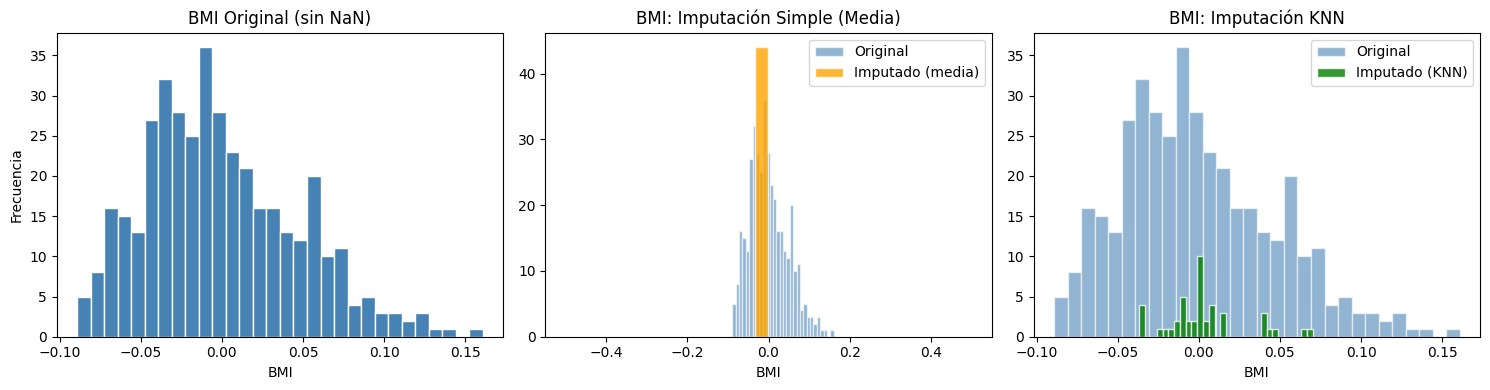

Gráfica guardada como bmi_comparacion.png


In [10]:
fig, axes = plt.subplots(1, 3, figsize=(15, 4))

# Original (con NaN ignorados)
axes[0].hist(bmi_original.dropna(), bins=30, color='steelblue', edgecolor='white')
axes[0].set_title('BMI Original (sin NaN)')
axes[0].set_xlabel('BMI')
axes[0].set_ylabel('Frecuencia')

# Imputación simple
axes[1].hist(bmi_original.dropna(), bins=30, color='steelblue', edgecolor='white', alpha=0.6, label='Original')
axes[1].hist(data.loc[bmi_original.isnull(), 'bmi_simple'], bins=30, color='orange', edgecolor='white', alpha=0.8, label='Imputado (media)')
axes[1].set_title('BMI: Imputación Simple (Media)')
axes[1].set_xlabel('BMI')
axes[1].legend()

# Imputación KNN
axes[2].hist(bmi_original.dropna(), bins=30, color='steelblue', edgecolor='white', alpha=0.6, label='Original')
axes[2].hist(data.loc[bmi_original.isnull(), 'bmi_knn'], bins=30, color='green', edgecolor='white', alpha=0.8, label='Imputado (KNN)')
axes[2].set_title('BMI: Imputación KNN')
axes[2].set_xlabel('BMI')
axes[2].legend()

plt.tight_layout()
plt.savefig('bmi_comparacion.png', dpi=100)
plt.show()
print('Gráfica guardada como bmi_comparacion.png')